**Import the neccessary libraries**

In [0]:
import keras.backend as k
from keras.models import Sequential, Model
from keras import Input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization, Activation, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt
import numpy as np

**Data loading and pre-processing steps**

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

In [0]:
input_shape = (100, 100, 3)
batch_size = 32

In [4]:
train = datagen.flow_from_directory('data/train/', target_size=input_shape[0:2], class_mode='binary', batch_size=batch_size, shuffle=True)
val = datagen.flow_from_directory('data/val/', target_size=input_shape[0:2], class_mode='binary', batch_size=batch_size, shuffle=True)
test = datagen.flow_from_directory('data/test/', target_size=input_shape[0:2], class_mode='binary', batch_size=batch_size, shuffle=True)

Found 16534 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of index (from 0 to 31 for single batch of images of size 32) below and re-run to see different examples.

y =  1


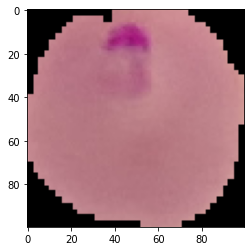

In [12]:
index = 18
print('y = ', int(train[0][1][index]))
plt.imshow(train[0][0][index])

**Create the model**

In [0]:
model = Sequential(name='Sequential_model')

model.add(Conv2D(input_shape=input_shape, filters=8, kernel_size=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128))
model.add(Activation('relu'))

model.add(Dense(units=128))
model.add(Activation('relu'))

model.add(Dense(units=1, activation='sigmoid'))

**Compile the model**

In [0]:
opt = Adam(learning_rate=0.00008)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

**Train the model**

In [15]:
history = model.fit(train, steps_per_epoch=len(train), epochs=15, verbose=1, validation_data=val, validation_steps=len(val), workers=20, use_multiprocessing=True)

Epoch 1/15
517/517 [==============================] - 815s 2s/step - loss: 0.6417 - accuracy: 0.6246 - val_loss: 0.5283 - val_accuracy: 0.7032
Epoch 2/15
517/517 [==============================] - 121s 234ms/step - loss: 0.5225 - accuracy: 0.7528 - val_loss: 0.3519 - val_accuracy: 0.8026
Epoch 3/15
517/517 [==============================] - 127s 245ms/step - loss: 0.3613 - accuracy: 0.8533 - val_loss: 0.4083 - val_accuracy: 0.8730
Epoch 4/15
517/517 [==============================] - 124s 240ms/step - loss: 0.2314 - accuracy: 0.9135 - val_loss: 0.1335 - val_accuracy: 0.9156
Epoch 5/15
517/517 [==============================] - 123s 237ms/step - loss: 0.1893 - accuracy: 0.9319 - val_loss: 0.0626 - val_accuracy: 0.9399
Epoch 6/15
517/517 [==============================] - 125s 241ms/step - loss: 0.1695 - accuracy: 0.9427 - val_loss: 0.0145 - val_accuracy: 0.9439
Epoch 7/15
517/517 [==============================] - 128s 247ms/step - loss: 0.1585 - accuracy: 0.9482 - val_loss: 0.0229 - va

**Plot the training and validation loss**

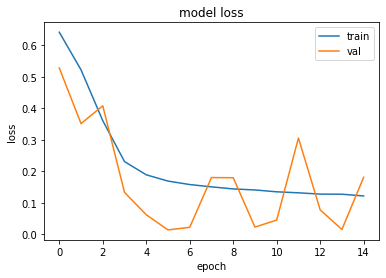

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**Plot the training and validation accuracy**

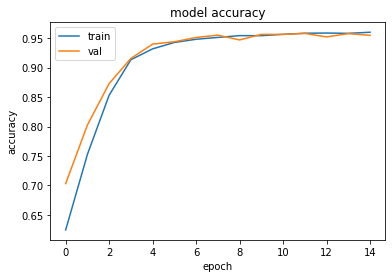

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

**Evaluate on Test set**

In [18]:
model.evaluate(test, steps=len(test), workers=20, use_multiprocessing=True)

173/173 [==============================] - 17s 97ms/step


[0.05034537613391876, 0.9553701281547546]

So, as you can see that I've got around **96% accuracy** in the  Test set

**Save the weights**

In [0]:
model.save_weights('weights.h5')

**Plot the output of some intermediate layers for single image**

In [0]:
feature_extractor = Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])

In [0]:
feature = feature_extractor.predict(train[0][0])

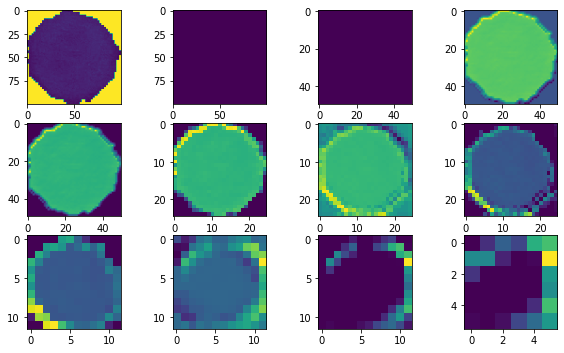

In [30]:
plt.figure(figsize=(10,10))
columns = 4
for i, image in enumerate(feature[:12]):
    plt.subplot(len(feature) / columns + 1, columns, i + 1)
    plt.imshow(image[1,:,:,4])

**Summary of the Model**

In [31]:
model.summary()

Model: "Sequential_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 8)       32        
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 32)   